In [16]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import os

## Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense

import cv2
import pandas as pd
import random
import ntpath

## Sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [17]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv('driving_log.csv', names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

ipykernel_launcher:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,center,left,right,steering,throttle,reverse,speed
0,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_029.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_029.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_029.jpg,0.0,0.026158,0.0,9.279671
1,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_098.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_098.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_098.jpg,0.0,0.000000,0.0,9.207142
2,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_168.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_168.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_168.jpg,0.0,0.000000,0.0,9.151583
3,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_235.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_235.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_235.jpg,0.0,0.000000,0.0,9.096358
4,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_309.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_309.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_309.jpg,0.0,0.165645,0.0,9.086135


In [18]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2021_03_29_10_30_42_029.jpg,left_2021_03_29_10_30_42_029.jpg,right_2021_03_29_10_30_42_029.jpg,0.0,0.026158,0.0,9.279671
1,center_2021_03_29_10_30_42_098.jpg,left_2021_03_29_10_30_42_098.jpg,right_2021_03_29_10_30_42_098.jpg,0.0,0.000000,0.0,9.207142
2,center_2021_03_29_10_30_42_168.jpg,left_2021_03_29_10_30_42_168.jpg,right_2021_03_29_10_30_42_168.jpg,0.0,0.000000,0.0,9.151583
3,center_2021_03_29_10_30_42_235.jpg,left_2021_03_29_10_30_42_235.jpg,right_2021_03_29_10_30_42_235.jpg,0.0,0.000000,0.0,9.096358
4,center_2021_03_29_10_30_42_309.jpg,left_2021_03_29_10_30_42_309.jpg,right_2021_03_29_10_30_42_309.jpg,0.0,0.165645,0.0,9.086135


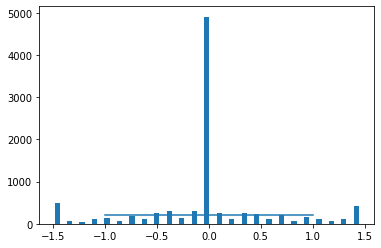

In [19]:

num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = bins[:-1] + bins[1:] * 0.5  # center the bins to 0

plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [20]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering('IMG', data)

Training Samples: 7396
Valid Samples: 1850


Text(0.5, 1.0, 'Validation set')

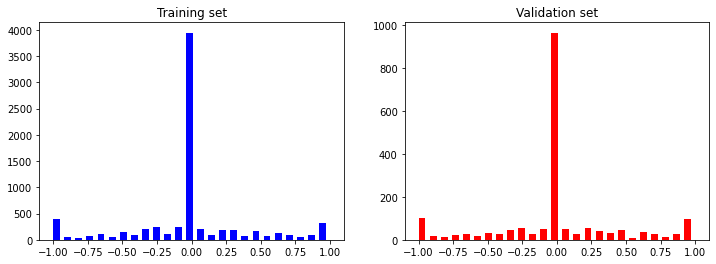

In [21]:

X_train, X_valid, Y_train, Y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=0)

print("Training Samples: {}\nValid Samples: {}".format(len(X_train), len(X_valid)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(Y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(Y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [22]:
def img_preprocess(img):
  img = npimg.imread(img)
  
  ## Crop image to remove unnecessary features
  img = img[60:135, :, :]
  
  ## Change to YUV image
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  
  ## Gaussian blur
  img = cv2.GaussianBlur(img, (3, 3), 0)
  
  ## Decrease size for easier processing
  img = cv2.resize(img, (100, 100))
  
  ## Normalize values
  img = img / 255
  return img

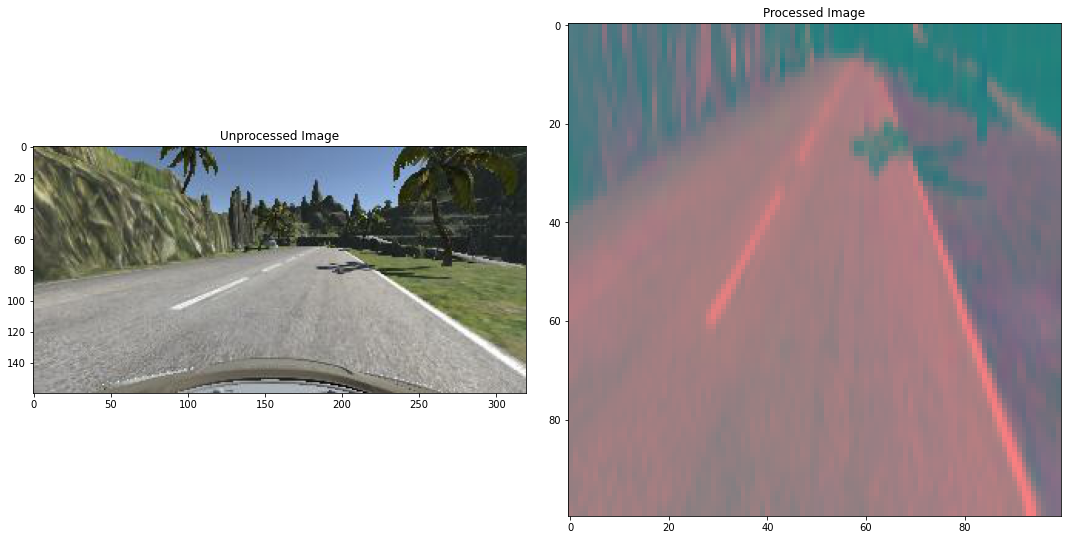

In [31]:
image = image_paths[897]
original_image = npimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Unprocessed Image')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Processed Image')
plt.savefig("Image_comparison")

In [24]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

In [25]:
from keras.applications import ResNet50
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in resnet.layers[:-4]:
    layer.trainable = False
 
for layer in resnet.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ffb58a246d0> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7ffb58601cd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ffb4029efd0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7ffb402ae850> False
<tensorflow.python.keras.layers.core.Activation object at 0x7ffb58a0ad90> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7ffb402ae510> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ffb402b1ed0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ffb402bc450> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7ffb402ba750> False
<tensorflow.python.keras.layers.core.Activation object at 0x7ffb402bc250> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ffb610d79d0> False
<tensorflow.python.keras.laye

In [26]:
def nvidia_model():
  model = Sequential()
  model.add(resnet)
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
  return model

model = nvidia_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               3276900   
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)               

Epoch 1/10
58/58 [==============================] - 89s 1s/step - loss: 25.0097 - accuracy: 0.2879 - val_loss: 0.2005 - val_accuracy: 0.5205
Epoch 2/10
58/58 [==============================] - 78s 1s/step - loss: 3.1259 - accuracy: 0.3254 - val_loss: 0.1952 - val_accuracy: 0.5205
Epoch 3/10
58/58 [==============================] - 79s 1s/step - loss: 2.6909 - accuracy: 0.3428 - val_loss: 0.1914 - val_accuracy: 0.5205
Epoch 4/10
58/58 [==============================] - 78s 1s/step - loss: 2.5413 - accuracy: 0.3405 - val_loss: 0.2003 - val_accuracy: 0.5205
Epoch 5/10
58/58 [==============================] - 78s 1s/step - loss: 2.2676 - accuracy: 0.3583 - val_loss: 0.1938 - val_accuracy: 0.5205
Epoch 6/10
58/58 [==============================] - 78s 1s/step - loss: 2.2086 - accuracy: 0.3393 - val_loss: 0.1973 - val_accuracy: 0.5205
Epoch 7/10
58/58 [==============================] - 78s 1s/step - loss: 1.9304 - accuracy: 0.3572 - val_loss: 0.2023 - val_accuracy: 0.5205
Epoch 8/10
58/58 [=

Text(0.5, 0, 'Epoch')

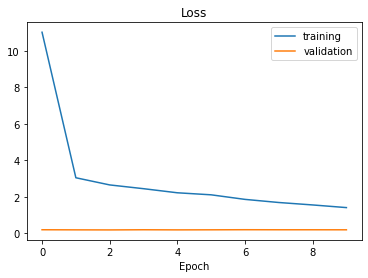

In [27]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',
#                                  monitor='val_loss',
#                                  verbose=0,
#                                  save_best_only=args.save_best_only,
#                                  mode='auto')
                                 
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid), batch_size=128, verbose=1, shuffle=1)
model.save('model', save_format='h5')


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [28]:
history.history['val_loss']

[0.20053420960903168,
 0.1951598823070526,
 0.1913975030183792,
 0.20027762651443481,
 0.1938067525625229,
 0.19731555879116058,
 0.20228618383407593,
 0.19975551962852478,
 0.1994914412498474,
 0.1977788805961609]